# Clustering

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Iris dataset

The dataset contains 3 classes with 50 instances (samples) each, where each class represents one species of iris.

Number of instances: 150 (50 in each of the three classes). One class is linearly separable from the other two; these other two are NOT linearly separable.

Number of attributes: 4 numerical predictive attributes and the class.

Attribute information:

    sepal length in cm

    sepal width in cm

    petal length in cm

    petal width in cm

    class:

        Iris Setosa

        Iris Versicolour

        Iris Virginica

![tut4_iris](https://storage.googleapis.com/kaggle-media/learn/images/RcxYYBA.png)


In [125]:
iris = pd.read_csv("datasets/iris.csv")
display(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 150 non-null    int64  
 1   Sepal Length (cm)  150 non-null    float64
 2   Sepal Width (cm)   150 non-null    float64
 3   Petal Length (cm)  150 non-null    float64
 4   Petal Width (cm)   150 non-null    float64
 5   Species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

In [126]:
display(iris.describe())

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [127]:
display(iris)

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [128]:
iris.columns = ["id", "sepall", "sepalw", "petall", "petalw", "class"]
iris

,id,sepall,sepalw,petall,petalw,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [129]:
X = iris.drop(columns=["id", "class"])  # Subset of features used for clustering
Y = iris["class"]  # Control variable used exclusively for evaluating the quality of the obtained clusters

In [130]:
import seaborn as sns
def pairplot(x, y):
  """
  Pairplot for visualizing the distribution of instances with respect to each pair of features.

  Parameters:
    x: pd.DataFrame
      Set of instances to be displayed
    y: pd.Series
      Label assigned to each instance
  """
  data = x.copy()
  data["class"] = y.astype("str")
  sns.pairplot(data, hue="class")

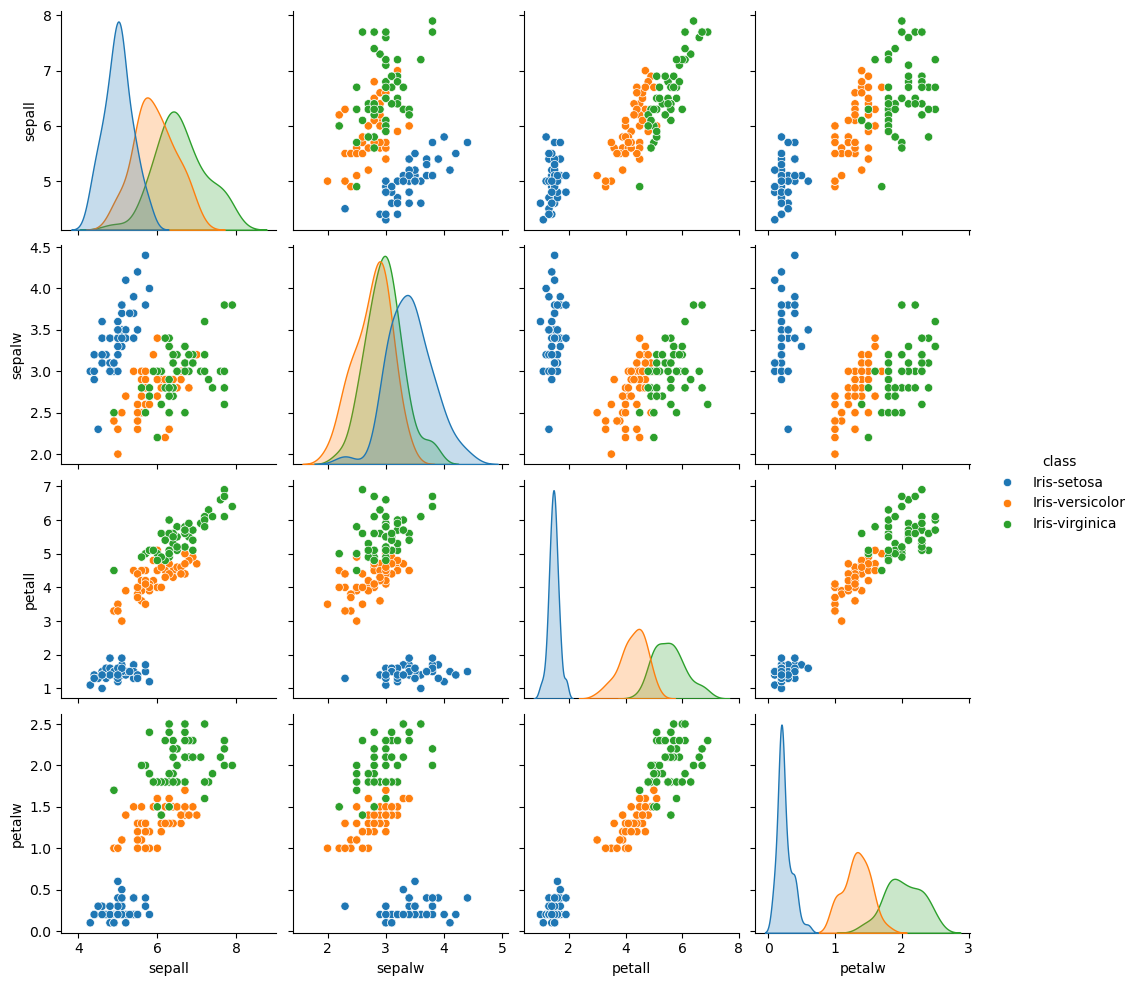

In [131]:
pairplot(X, Y)

# K-Means

In [156]:
from sklearn.cluster import KMeans
#!pip install scikit-learn

In [157]:
# Configuration of the KMeans algorithm and then running it on the dataset X
km = KMeans(n_clusters = 3, init = "k-means++", n_init = 10, max_iter = 300).fit(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Parameters configure the behavior of the KMeans method.  
We change the following set of parameters:
* __n_cluster__: the number of centroids, i.e., the clusters the algorithm assumes,
* __init__: the choice of centroid initialization technique,
* __n_init__: how many times clustering is run before returning the best achieved result,
* __max_iter__: the maximum number of iterations when positioning the centroids.

In [134]:
type(km)

sklearn.cluster._kmeans.KMeans

Attributes of the KMeans object contain information about the clustering process and the obtained results:
- **n_iter_**: the number of iterations performed when positioning the centroids,
- **cluster_centers_**: coordinates of the centroids,
- **labels_**: label assigned to each clustered instance,
- **inertia_**: sum of squared distances of each instance to its nearest centroid (unexplained portion of variance)

In [164]:
km.n_iter_

4

In [165]:
km.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [166]:
def centroids_df(data, centers):
  """
  A clearer representation of the locations of centroids as rows of a DataFrame whose columns have names identical to the dataset on which clustering was performed.

  Parameters:
    data: pd.DataFrame
      Dataset on which clustering was performed
    centers: np.ndarray
      Matrix with dimensions number_of_centroids*number_of_attributes
  
  Returns:
    pd.DataFrame
      Centroids wrapped in a DataFrame whose columns have the same names as the columns of the dataset
  """
  centroids = pd.DataFrame(data = centers)
  centroids.columns = data.columns
  return centroids

In [167]:
centroids_df(X, km.cluster_centers_)

,sepall,sepalw,petall,petalw
0,5.006000,3.418000,1.464000,0.244000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


In [168]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

,sepall,sepalw,petall,petalw
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


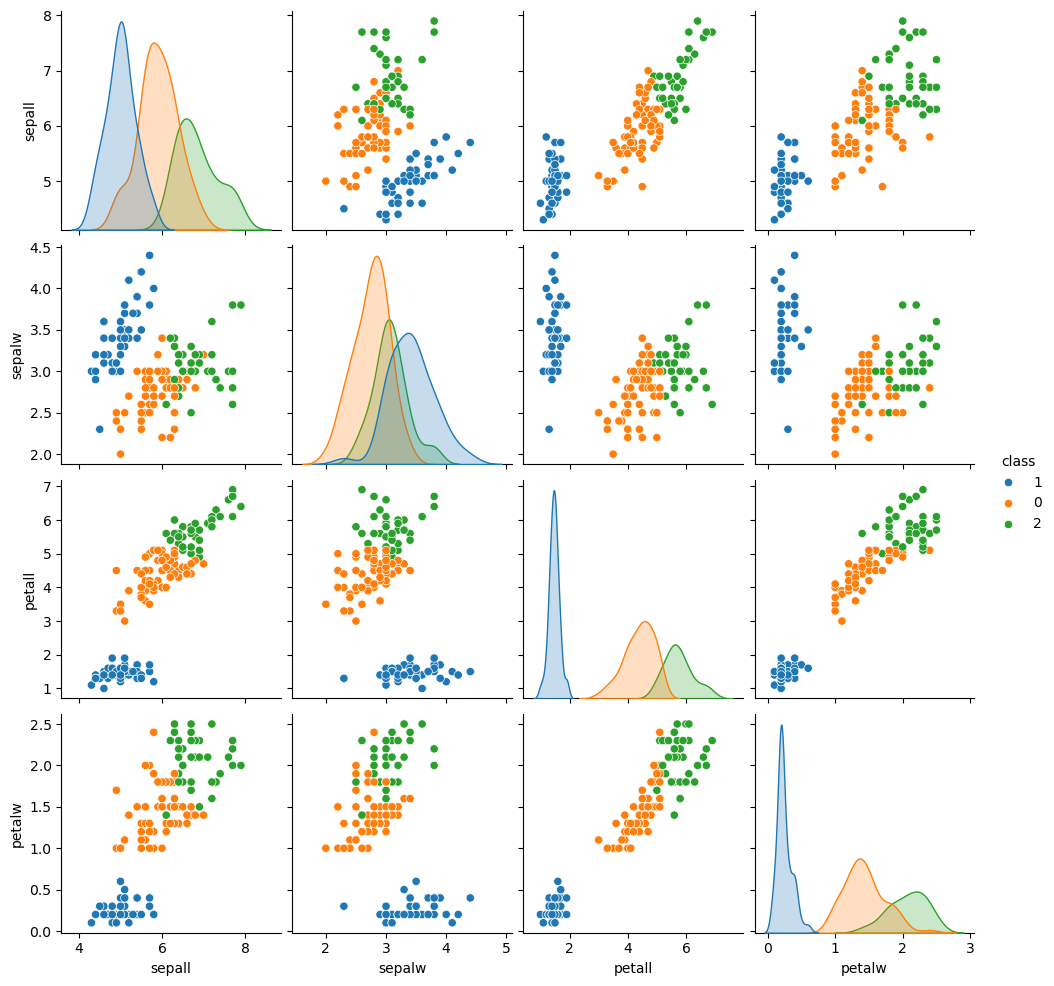

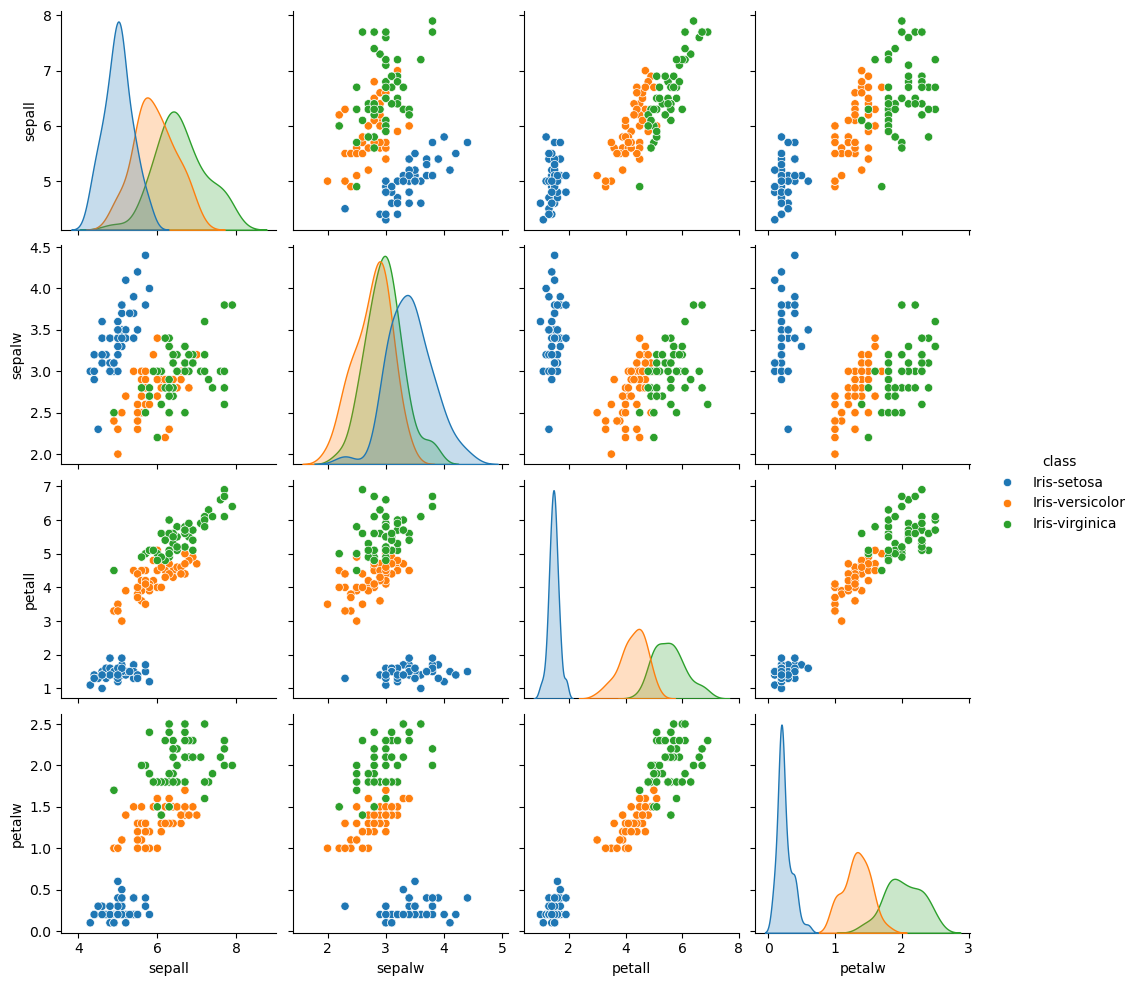

In [140]:
display(centroids_df(X, km.cluster_centers_))
pairplot(X, km.labels_)
pairplot(X,Y)

In [169]:
def confusion(true, pred):
  """
  Confusion matrix of assigned labels to instances.
  Compares known labels taken from the original dataset
  and generated labels in the clustering process.
  
  Parameters:
    true, pred: pd.Series
      Series of true and assigned labels
  
  Returns:
    summary: pd.DataFrame
      Matrix whose row indices correspond to the original labels, column names to the assigned labels,
      and the content of the matrix represents the distribution of instances according to these two labeling methods
  """
  matching = pd.DataFrame(data={
      "true": true,
      "pred": pred
  })
  gby = matching.groupby(by=["true", "pred"])
  summary = gby["true"].count()
  summary = summary.unstack(1).fillna(0).astype(int)
  return summary

In [170]:
confusion(Y, km.labels_)

pred,0,1,2
true,,,
Iris-setosa,50,0,0
Iris-versicolor,0,48,2
Iris-virginica,0,14,36


## Standardization of independent variables

In [171]:
Xstd = X.copy()

for col in Xstd.columns:
  mean = Xstd[col].mean()
  std = Xstd[col].std()

  Xstd[col] -= mean
  Xstd[col] /= std

In [172]:
display(Xstd.describe())
display(Xstd)

,sepall,sepalw,petall,petalw
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.210647e-16,-6.158037e-16,1.421085e-16,-1.421085e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.430844e+00,-1.563497e+00,-1.439627e+00
25%,-8.976739e-01,-5.858010e-01,-1.223442e+00,-1.177559e+00
50%,-5.233076e-02,-1.245404e-01,3.351431e-01,1.327811e-01
75%,6.722490e-01,5.673506e-01,7.602119e-01,7.879511e-01
max,2.483699e+00,3.104284e+00,1.780377e+00,1.705189e+00


,sepall,sepalw,petall,petalw
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121
146,0.551486,-1.277692,0.703536,0.918985
147,0.793012,-0.124540,0.816888,1.050019
148,0.430722,0.797981,0.930239,1.443121


In [173]:
km = KMeans(n_clusters = 3, init = "k-means++", n_init = 10, max_iter = 300).fit(Xstd) # Same clustering on standardized data

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [146]:
display(centroids_df(Xstd, km.cluster_centers_))
display(km.labels_)

,sepall,sepalw,petall,petalw
0,-1.011191,0.839494,-1.300521,-1.250938
1,1.132177,0.096276,0.992945,1.013776
2,-0.050052,-0.877353,0.346371,0.281121


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

,sepall,sepalw,petall,petalw
0,-1.011191,0.839494,-1.300521,-1.250938
1,1.132177,0.096276,0.992945,1.013776
2,-0.050052,-0.877353,0.346371,0.281121


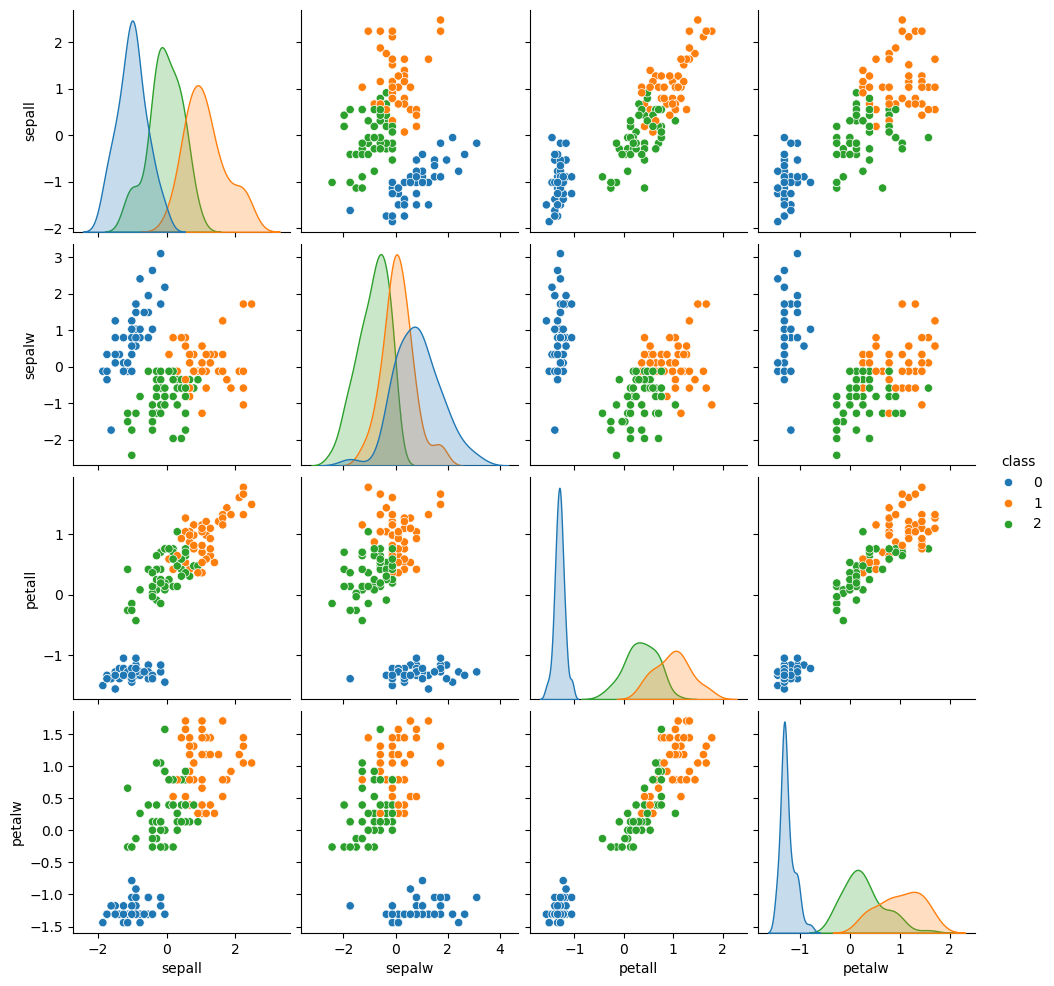

In [147]:
display(centroids_df(Xstd, km.cluster_centers_))
pairplot(Xstd, km.labels_)

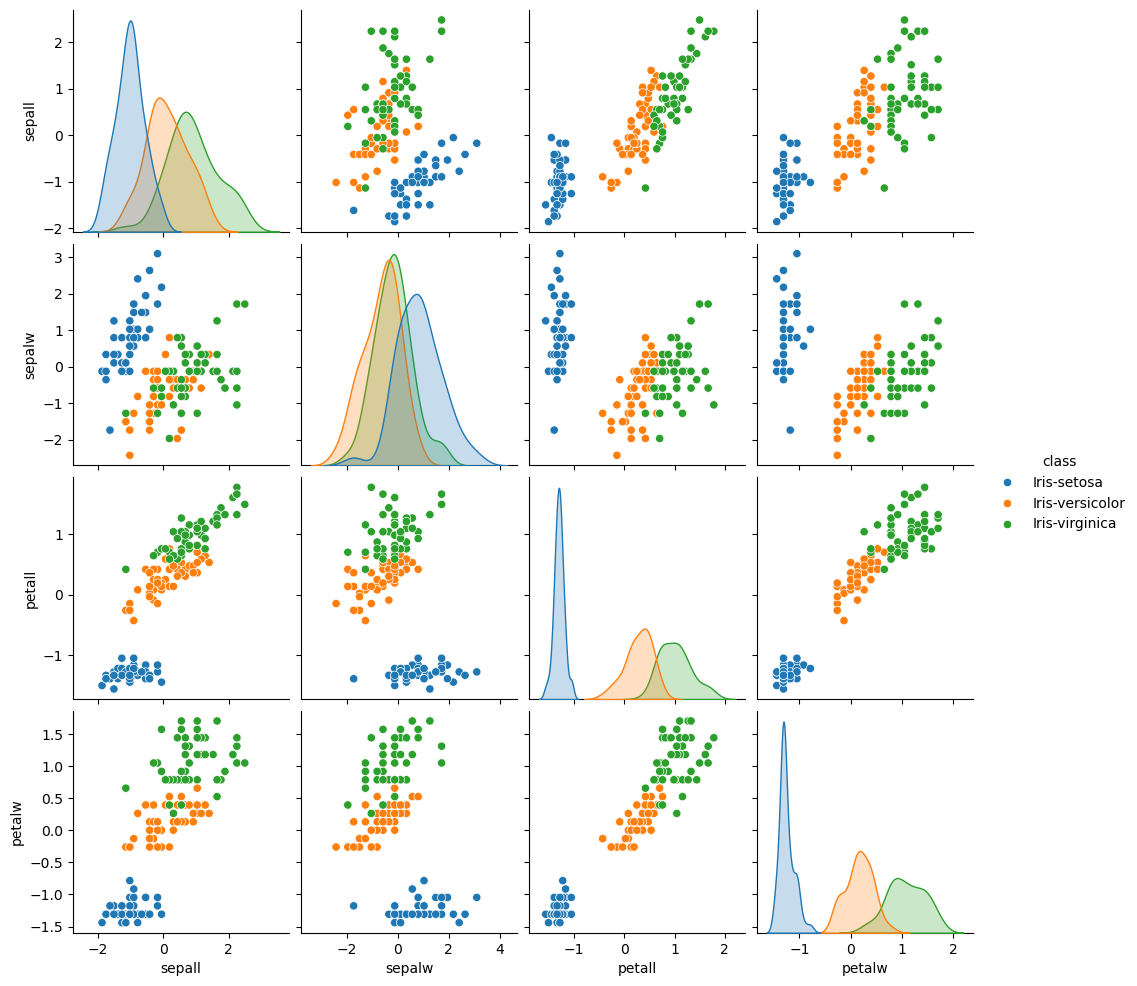

In [148]:
pairplot(Xstd,Y)

In [174]:
confusion(Y, km.labels_) # A slightly different result is obtained

pred,0,1,2
true,,,
Iris-setosa,50,0,0
Iris-versicolor,0,39,11
Iris-virginica,0,17,33


K-Means algorithm is sensitive to the scale of each variable's distribution.
Scaling and transforming values can lead to different clustering results.

Variables with larger dispersion have greater influence in the clustering process.

## Clustering with 5 centroids

Clustering is _meaningful_ for any number of clusters K > 1

In [175]:
km = KMeans(n_clusters = 5, init = "k-means++", n_init = 10, max_iter = 300).fit(X) 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [151]:
km.n_iter_

9

In [152]:
display(centroids_df(X, km.cluster_centers_))
display(km.labels_)

,sepall,sepalw,petall,petalw
0,6.529167,3.058333,5.508333,2.162500
1,5.006000,3.418000,1.464000,0.244000
2,5.508000,2.600000,3.908000,1.204000
3,7.475000,3.125000,6.300000,2.050000
4,6.207692,2.853846,4.746154,1.564103


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 0, 4, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 4, 0, 0, 0, 3, 3, 4, 0, 4, 3, 4, 0, 3, 4, 4, 0, 3, 3, 3,
       0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4])

array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256]])

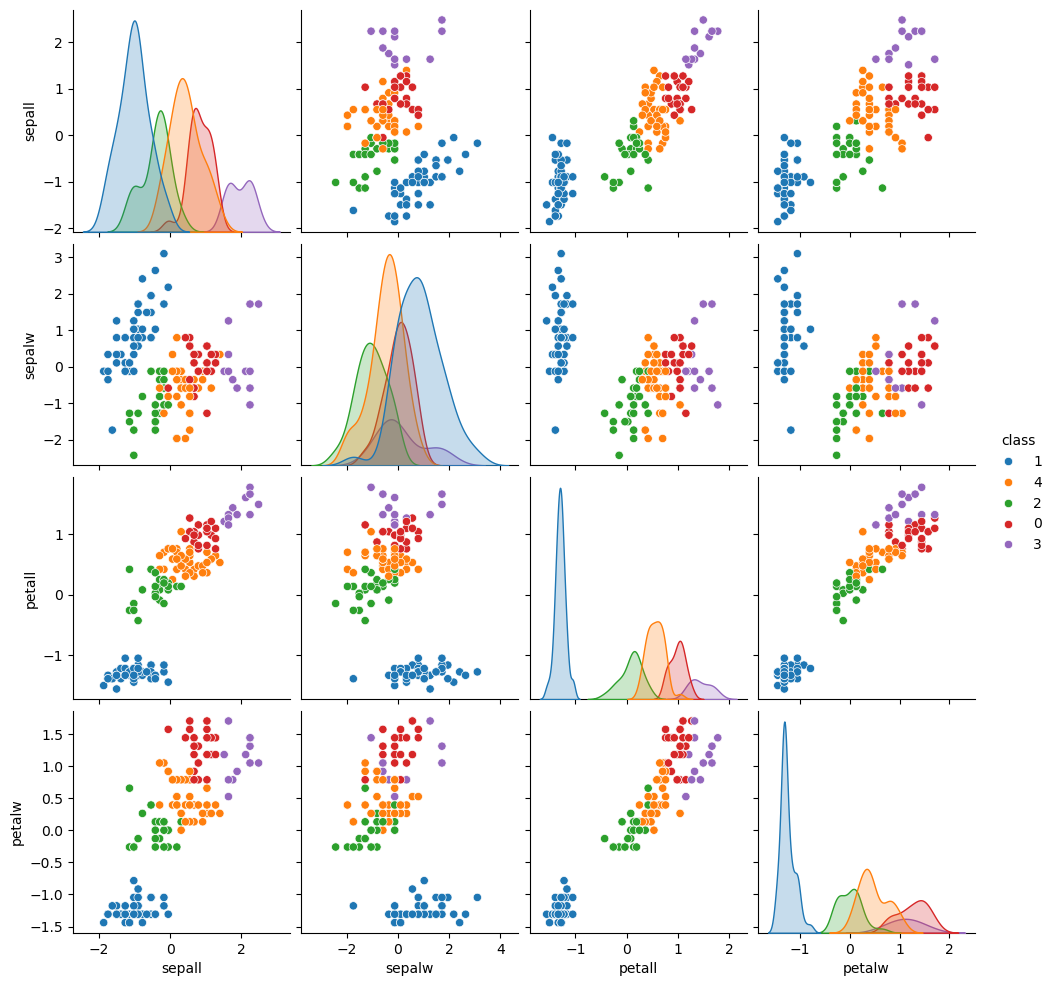

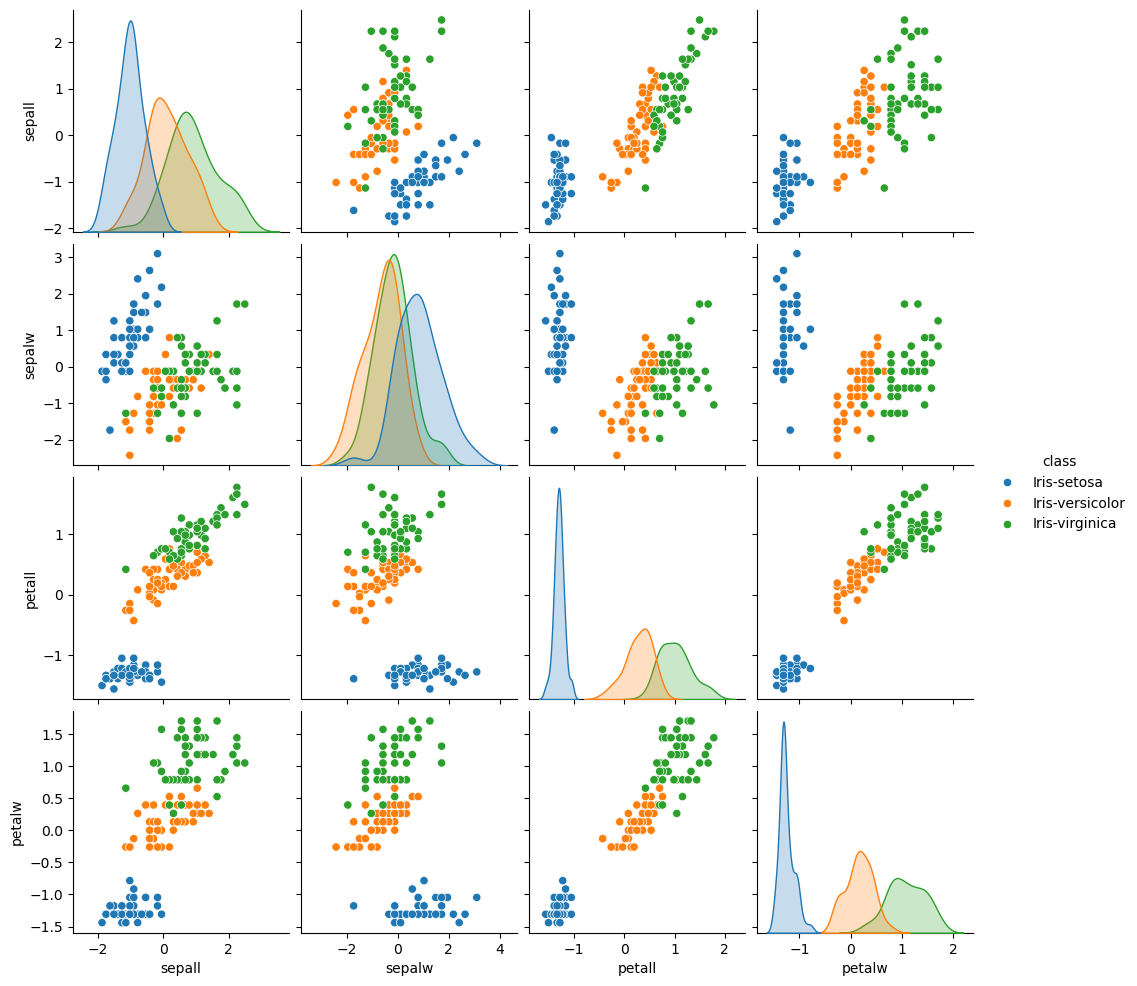

In [153]:
display(km.cluster_centers_)
pairplot(Xstd, km.labels_)
pairplot(Xstd,Y)

One cluster completely overlaps with the Iris-setosa class.

The other four clusters split the instances belonging to the Iris-versicolor and Iris-virginica classes.

In [176]:
confusion(Y, km.labels_)

pred,0,1,2,3,4
true,,,,,
Iris-setosa,0,50,0,0,0
Iris-versicolor,26,0,0,0,24
Iris-virginica,13,0,24,12,1


## Elbow method

Procedure (and the accompanying plot) that can serve as a starting point for deciding the number of clusters to consider.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

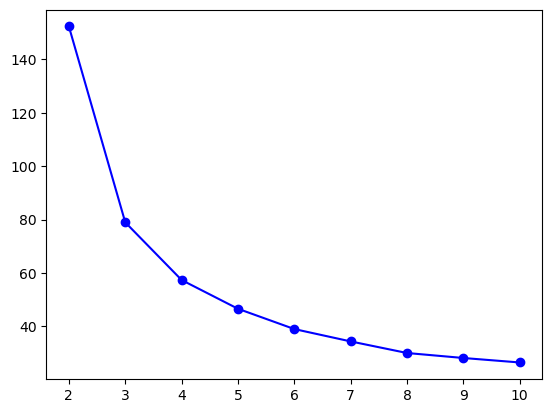

In [177]:
x = []
y = []

for nc in range(2,11):
  km = KMeans(n_clusters = nc, init = "k-means++", n_init = 10, max_iter = 300).fit(X)
  x.append(nc)
  y.append(km.inertia_)

plt.plot(x,y, "-ob")
plt.show()